# Kitti Dataset Loader

In [4]:
import os
import subprocess
from PIL import Image
import numpy as np
import skimage.io

# from datasets.base import BaseDataset
# from utils.boxes import generate_anchors


In [3]:
filename = 'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/data_object_image_2/training/image_2/000019.png'

In [13]:
image = Image.open(filename)

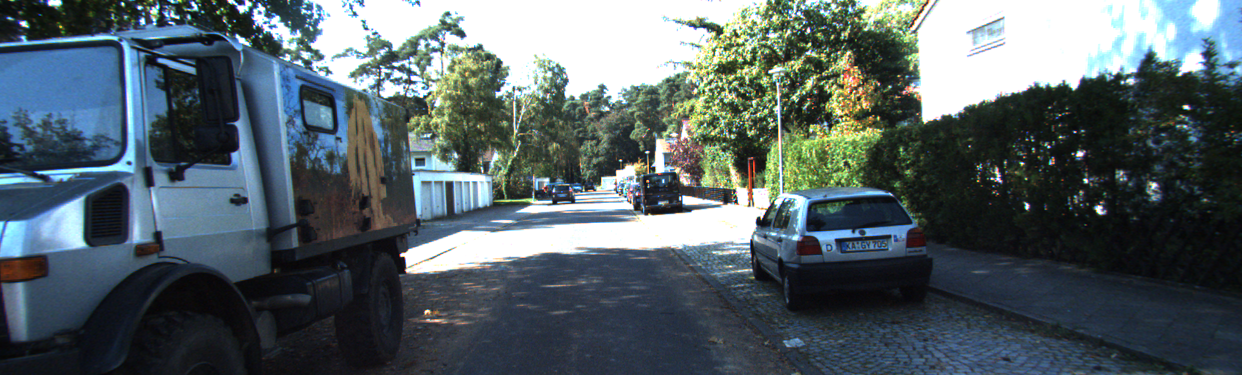

In [14]:
image

Data Format:

   # Values    Name      Description
------------------------------------------------------------------------------------
1.   1: ----- type  ----- Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
2.   1 -----truncated-----Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
3.   1----- occluded-----Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
4.   1-----alpha-----Observation angle of object, ranging [-pi..pi]
5.   4-----bbox-----2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
6.   3-----dimensions-----3D object dimensions: height, width, length (in meters)
7.   3-----location-----3D object location x,y,z in camera coordinates (in meters)
8.   1-----rotation_y-----Rotation ry around Y-axis in camera coordinates [-pi..pi]
9.   1-----score-----Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.
                     
We do not have a score so we don't work with it. The model is what acctually outputs the score


In [1]:
import matplotlib.pyplot as plt
import cv2

In [29]:
image = cv2.imread(filename)

In [30]:
image.shape

(375, 1242, 3)

In [51]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
cv2.imwrite('processied_img.png', image)

True

In [30]:
x = [0.00, 424.74]   # max = 1242
y = [0.00, 374.00]   # max = 375


In [25]:
742.41 184.49 944.56 321.39

212.0

In [50]:
image = cv2.line(image, (944,184), (944, 322), (0, 130, 100),5)

In [32]:
image = cv2.circle(image, (212,187), radius=0, color=(0,0,255), thickness=10)

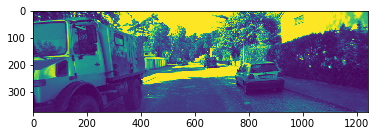

In [36]:
plt.imshow(image)

# Loading Labels files

In [54]:
filename_txt = 'C://Users/Billi/repos/Computer_Vision/basics/CNNsAP/Datasets/data_object_label_2/training/label_2/000019.txt'

In [64]:
file1 = open(filename_txt, "r")

file1.readlines()

['Truck 0.74 1 2.07 0.00 0.00 424.74 374.00 2.60 2.06 5.42 -3.17 1.77 5.46 1.57\n',
 'Car 0.00 0 -1.81 742.41 184.49 944.56 321.39 1.46 1.60 3.71 2.84 1.63 9.72 -1.54\n',
 'Van 0.00 0 -1.64 639.17 169.69 683.48 212.97 1.97 1.82 4.41 2.42 1.86 35.34 -1.57\n',
 'Car 0.00 0 -1.48 551.01 184.06 575.42 204.29 1.58 1.65 3.91 -3.85 2.52 59.59 -1.55\n',
 'DontCare -1 -1 -10 579.35 178.15 633.56 201.11 -1 -1 -1 -1000 -1000 -1000 -10\n',
 'DontCare -1 -1 -10 527.27 181.27 543.98 207.35 -1 -1 -1 -1000 -1000 -1000 -10\n']

# DataLoader for Kitti Dataset:

In [62]:
import torch
import numpy as np
import os
import torch.utils.data


In [ ]:
# inherits from the dataset class from torch
class BaseDataset(torch.utils.data.Dataset):
    def __init__(self, phase, cfg):
        super(BaseDataset, self).__init__()
        
        self.phase = phase
        self.cfg = cfg
    
    def __getitem__(self,index):
        image, image_id = self.load_image(index)
        
        